## <a id='toc1_1_'></a>[Измерение интенсивности радиационного фона](#toc0_)

**Содержание**<a id='toc0_'></a>    
- [Измерение интенсивности радиационного фона](#toc1_1_)    
    - [1 Введение](#toc1_1_1_)    
    - [2 Немного теории](#toc1_1_2_)    
      - [О природе космических лучей](#toc1_1_2_1_)    
      - [Постановка эксперимента](#toc1_1_2_2_)    
      - [Ошибки и распределение Пуассона](#toc1_1_2_3_)    
      - [Оборудование](#toc1_1_2_4_)    
      - [4 Импорты и ввод данных](#toc1_1_2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[1 Введение](#toc0_)


**Цель**: изучить свойства распределения Пуассона на примере радиационного фона

**Оборудование**: счётчик Гейгера-Мюллера (СТС-6), присоединенный к компьютеру с программой для снятия данных

### <a id='toc1_1_2_'></a>[2 Немного теории](#toc0_)

#### <a id='toc1_1_2_1_'></a>[О природе космических лучей](#toc0_)

На Земле можно наблюдать космические лучи:

- Первичные — приходят из космоса
- Вторичные — возникают благодаря взаимодействию первичных лучей с атмосферой Земли

Первичные космические лучи состоят из различных частиц:

- Протоны (92 %)
- Ядра гелия = альфа-частицы (6.6 %)
- Более тяжелые ядра
- Электроны и позитроны
- Другие частицы с более высокими энергиями (мало)

Очень малая доля первичных лучей доходит до поверхности Земли.

Вторичные лучи состоят из двух компонент:

- Жесткая компонента 
  - Вторичные протоны
  - Мюоны
- Мягкая компонента
  - Электроны
  - Позитроны
  - Фотоны

**В общем, до нас долетает много разных частиц и их распределение случайно.**

#### <a id='toc1_1_2_2_'></a>[Постановка эксперимента](#toc0_)

Мы измеряем количество частиц, проходящих через счётчик за 10 и за 40 секунд. Ожидается, что при большем интервале распределение Пуассона, которому подчиняются случайно прилетающие частицы, ближе к нормальному.

#### <a id='toc1_1_2_3_'></a>[Ошибки и распределение Пуассона](#toc0_)

Среднеквадратичная ошибка числа отсчётов, измеренного за некоторый интервал времени:

$$
\sigma = \sqrt{n_0}
$$

При проведении многочисленных опытов за $n_0$ принимается среднее арифметическое всех результатов $\overline n$, а стандартная ошибка отклонения $\overline n$ от $n_0$ может быть вычислена по формуле:

$$
\sigma_{\overline n} = \frac{1}{N} \sqrt{\sum_{i=1}^N(n_i - \overline n)^2}
$$

где $N$ - количество измерений, $n_i$ - результат $i$-того измерения.

Относительная же погрешность составит:

$$
\varepsilon_{\overline n} = \frac{1}{\sqrt{\overline n N}}
$$

Распределение Пуассона (выводится из теории вероятности):

$$
P_n = \frac{(\nu t)^n}{n!}e^{-\nu t}
$$

#### <a id='toc1_1_2_4_'></a>[Оборудование](#toc0_)

Счётчик подключён к компьютеру по такой схеме:

![Схема](image.png)

Мы считаем, что приборная погрешность мала по сравнению со случайными флуктуациями космических лучей, поэтому мы её не учитываем.

#### <a id='toc1_1_2_5_'></a>[4 Импорты и ввод данных](#toc0_)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.


In [3]:
data_20 = pd.read_csv('data_20.csv')
data_20

,1,2,3,4,5,6,7,8,9,10
0,38,24,45,26,33,21,30,21,26,18
1,27,33,32,36,31,26,36,16,25,23
2,29,32,27,28,29,27,29,30,27,28
3,19,29,26,26,20,21,34,31,30,30
4,31,28,24,29,21,21,28,29,25,29
5,29,33,20,31,31,26,40,22,28,24
6,18,48,19,33,35,31,21,34,26,32
7,23,27,33,40,28,36,32,40,31,24
8,24,30,26,22,31,42,27,40,34,26
9,29,25,25,32,25,29,23,33,23,28


In [4]:
data_20 = data_20.to_numpy().flatten()

In [5]:
values_10 = np.array([i for i in range(3, 24)] + [25, 27, 28])
counts_10 = np.array([1, 2, 1, 2, 5, 8, 17, 34, 32,
                      40, 38, 43, 33, 31, 36, 28, 12, 18,
                      10, 4, 1, 1, 2, 1])
data_10 = []
for i in range(len(values_10)):
    data_10 += [values_10[i]] * counts_10[i]
data_10 = np.array(data_10)

In [6]:
values_20, counts_20 = np.unique(data_20, return_counts=True)

data_40 = np.empty(100, dtype=int)
for i in range(100):
    data_40[i] = data_20[2*i] + data_20[2*i + 1]
values_40, counts_40 = np.unique(data_40, return_counts=True)

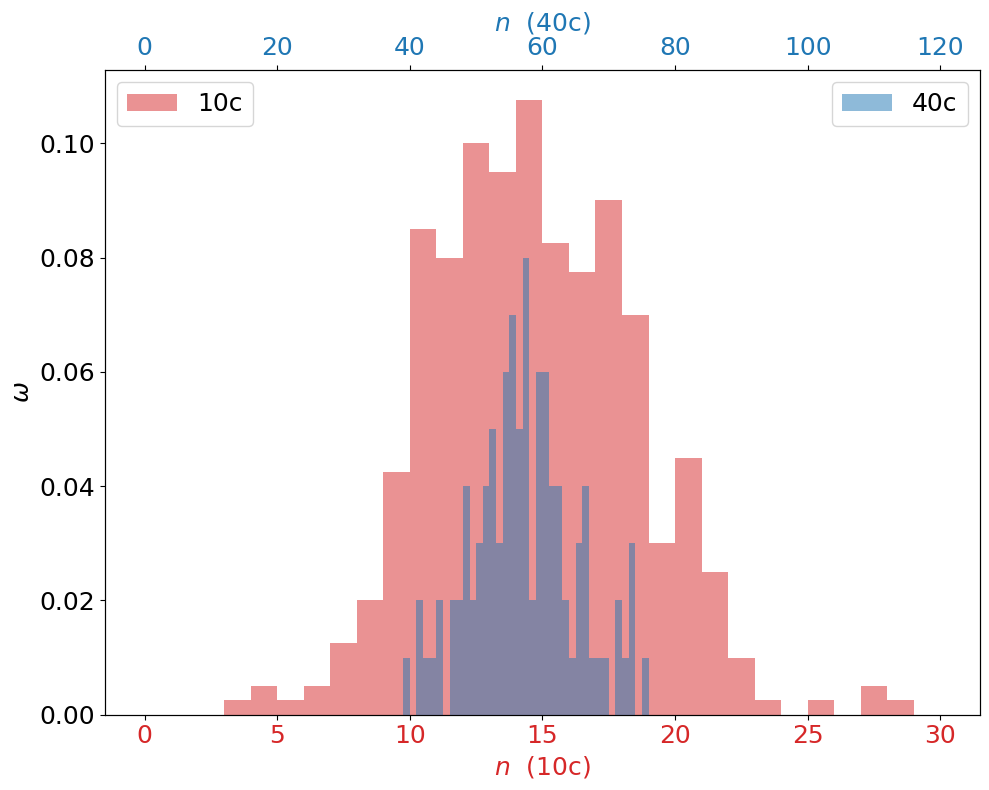

In [8]:
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

color = 'tab:red'
ax1.set_xlabel('$n$  (10с)', fontsize=18, color=color)
ax1.set_ylabel(r'$\omega$', fontsize=18)
ax1.hist(data_10, np.arange(0, 31), alpha=0.5, density=True, label='10с', color=color)

ax1.tick_params(axis='x', labelcolor=color,  labelsize=18)
ax1.tick_params(axis='y', labelcolor='#000000',  labelsize=18)
plt.legend(loc='upper left', fontsize=18)

color = 'tab:blue'
ax2 = ax1.twiny()
ax2.set_xlabel('$n$  (40с)', fontsize=18, color=color)

ax2.hist(data_40, np.arange(0, 121), alpha=0.5, density=True, label='40с')
ax2.tick_params(axis='x', labelcolor=color, labelsize=18)
fig.tight_layout()
plt.legend(loc='upper right', fontsize=18)
plt.show()

Проверим, что $\sigma = \sqrt{n_0}$:

In [62]:
n_mean_10 = np.mean(data_10)
n_mean_40 = np.mean(data_40)

comparison = pd.DataFrame(
    {
        'n': [n_mean_10, n_mean_40],
        'sigma': [np.sqrt(n_mean_10), np.sqrt(n_mean_40)],
        'sigma_theoretical': [np.sqrt(n_mean_10), np.sqrt(n_mean_40)],
        'hi_squared': [0.0, 0.0],
        'hi_squared_threshold': [0.0, 0.0]
    },
    index=['10с', '40с']
)

# compare observed and theoretical sigmas using hi-squared test

def hi_squared(observed, theoretical, n):
    return np.sum((observed - theoretical)**2 / theoretical) / n

comparison['hi_squared'] = [hi_squared(counts_10, counts_10, len(counts_10)), hi_squared(counts_40, counts_40, len(counts_40))]
comparison['hi_squared_threshold'] = [chi2.ppf(0.95, len(counts_10) - 1), chi2.ppf(0.95, len(counts_40) - 1)]

pd.set_option('display.float_format', lambda x: '%.4f' % x)
comparison

,n,sigma,sigma_theoretical,hi_squared,hi_squared_threshold
10с,14.1775,3.7653,3.7653,0.0000,35.1725
40с,56.7100,7.5306,7.5306,0.0000,46.1943


Теоретические и наблюдаемые сигмы действительно совпадают, это подтверждает простой тест хи-квадрат (вдаваться в подробности о том, как он работает, мы тут не будем)..

Теперь посчитаем, сколько значений попадает в одну сигму и сравним с теоретическим распределением Пуассона:

In [70]:
# function to calculate P_n = \frac{(\nu t)^n}{n!}e^{-\nu t} taking into account that \nu t = n_mean
def P_n(n, n_mean):
    return (n_mean**n / np.factorial(n)) * np.exp(-n_mean)

sigma_10 = comparison['sigma'].loc['10с']
sigma_40 = comparison['sigma'].loc['40с']

# expected probabilities for 10s in one sigma interval
n_mean_10 = comparison['n'].loc['10с']
range_limit = sigma_10
n_10 = np.arange(n_mean_10 - range_limit, n_mean_10 + range_limit + 1)
p_10 = P_n(n_10, n_mean_10) 
p_10_sum = np.sum(p_10)

# expected probabilities for 40s in one sigma interval
n_mean_40 = comparison['n'].loc['40с']
range_limit = sigma_40
n_40 = np.arange(n_mean_40 - range_limit, n_mean_40 + range_limit + 1)
p_40 = P_n(n_40, n_mean_40)
p_40_sum = np.sum(p_40)

# observed probabilities for 10s in one sigma interval
n_observed_10 = values_10
counts_10_1_sigma = counts_10[np.logical_and(values_10 >= n_mean_10 - sigma_10, values_10 <= n_mean_10 + sigma_10)]
p_observed_10 = counts_10_1_sigma / np.sum(counts_10)
p_observed_10_sum = np.sum(p_observed_10)

# observed probabilities for 40s in one sigma interval  
n_observed_40 = values_40
counts_40_1_sigma = counts_40[np.logical_and(values_40 >= n_mean_40 - sigma_40, values_40 <= n_mean_40 + sigma_40)]
p_observed_40 = counts_40_1_sigma / np.sum(counts_40)
p_observed_40_sum = np.sum(p_observed_40)

probabilities_comparison = pd.DataFrame(
    {
        'n': [n_mean_10, n_mean_40],
        'p_n_sum': [p_10_sum, p_40_sum],
        'p_observed_sum': [p_observed_10_sum, p_observed_40_sum],
        'hi_squared': [0.0, 0.0],
        'hi_squared_threshold': [0.0, 0.0]
    },
    index=['10с', '40с']
)

# compare observed and theoretical probabilities using hi-squared test
probabilities_comparison['hi_squared'] = [hi_squared(p_observed_10_sum, p_10_sum, len(p_observed_10)), hi_squared(p_observed_40_sum, p_40_sum, len(p_observed_40))]
probabilities_comparison['hi_squared_threshold'] = [chi2.ppf(0.95, len(p_observed_10) - 1), chi2.ppf(0.95, len(p_observed_40) - 1)]

probabilities_comparison

,n,p_n_sum,p_observed_sum,hi_squared,hi_squared_threshold
10с,14.1775,0.7672,0.6325,0.0034,12.5916
40с,56.7100,0.7394,0.6600,0.0006,23.6848


Таким образом, хоть значения и отличаются, исходя из теста хи-квадрат, они отличаются незначительно.